[*********************100%***********************]  1 of 1 completed


=== Sector: bank ===


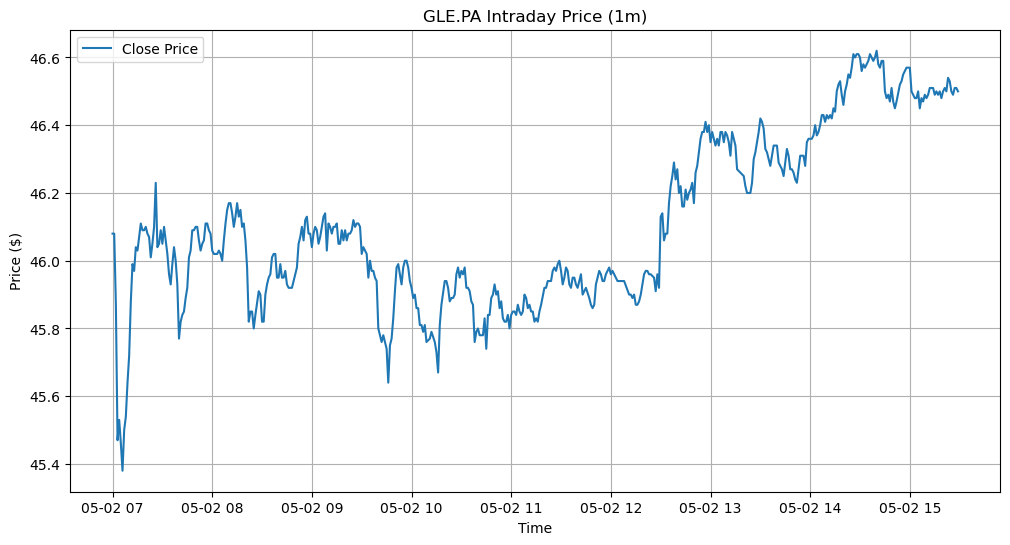

[*********************100%***********************]  1 of 1 completed


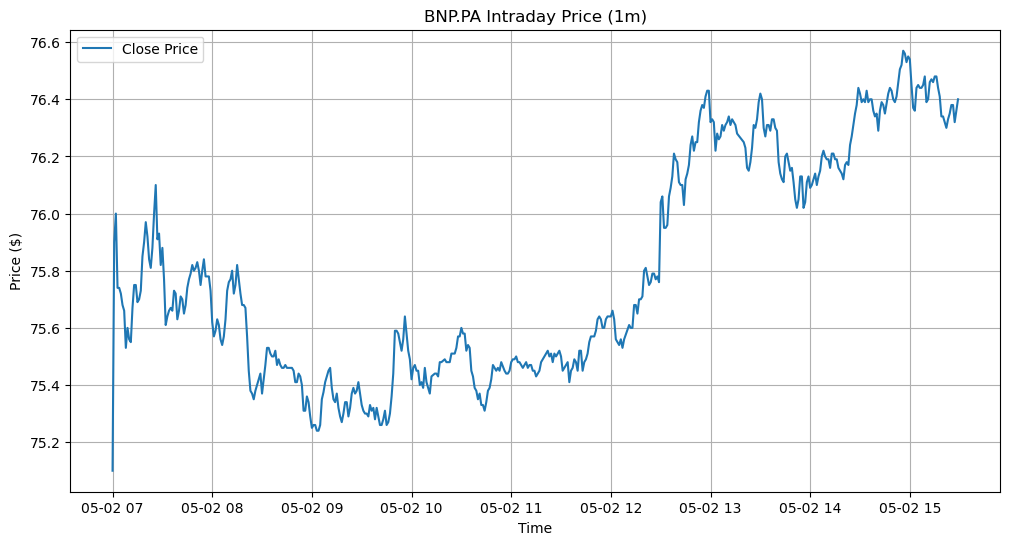

[*********************100%***********************]  1 of 1 completed


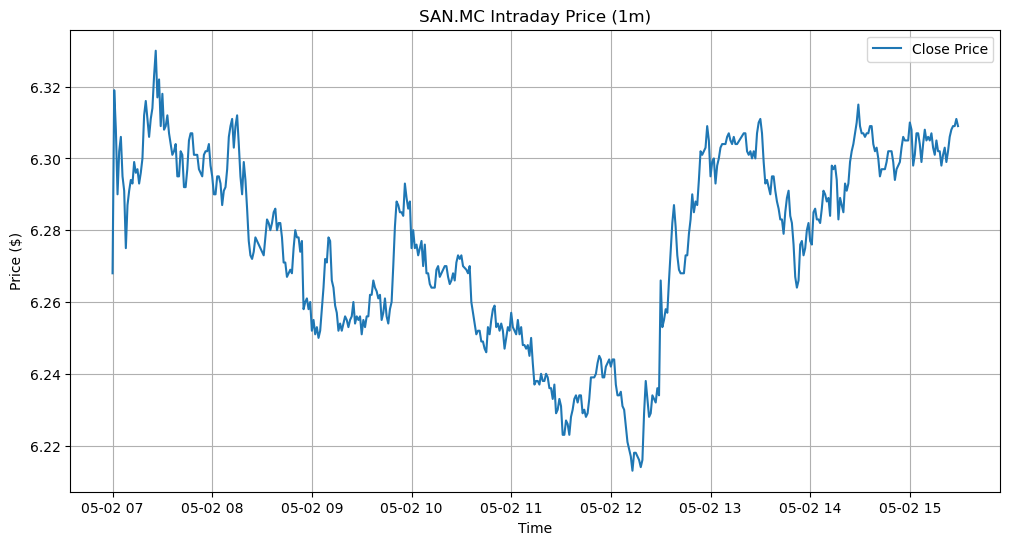

[*********************100%***********************]  1 of 1 completed


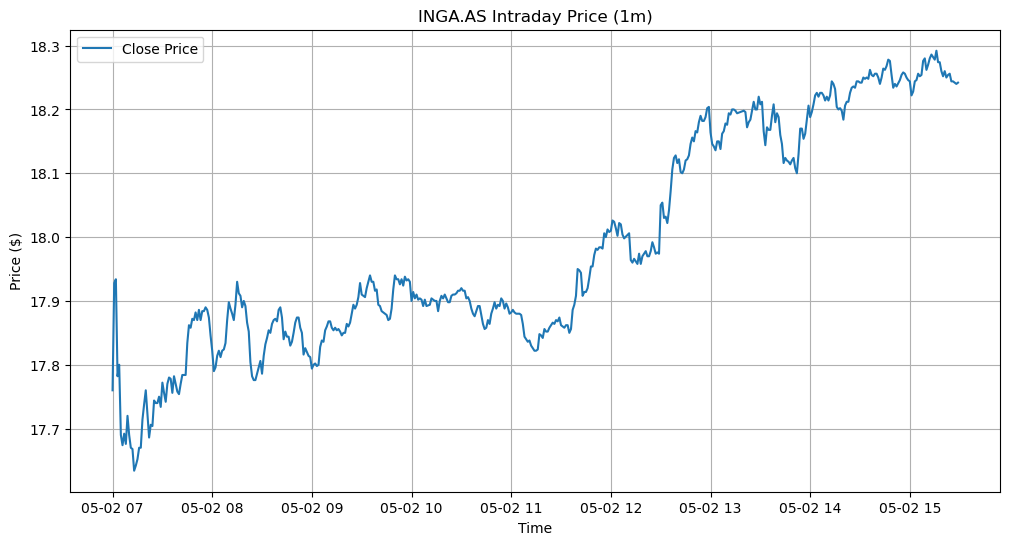

[*********************100%***********************]  1 of 1 completed


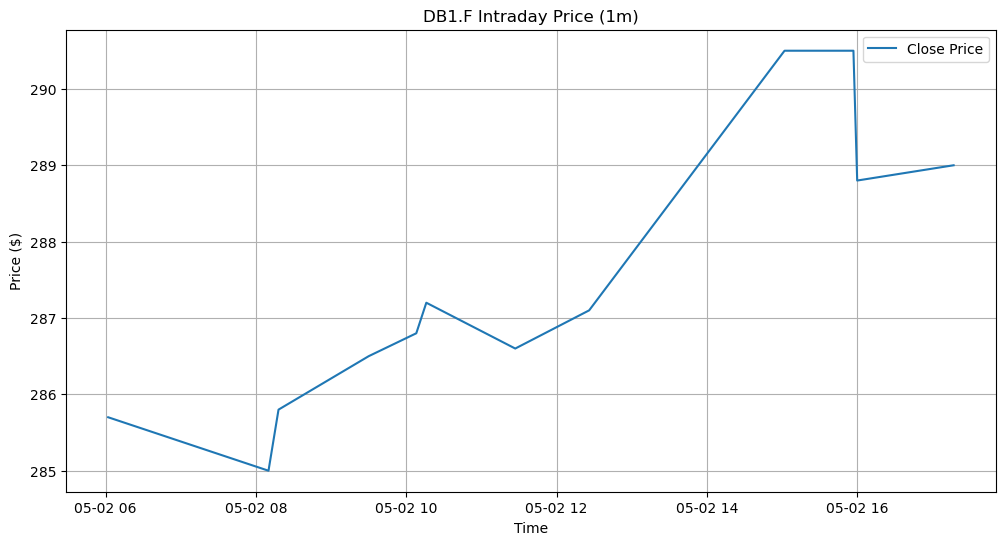

[*********************100%***********************]  1 of 1 completed


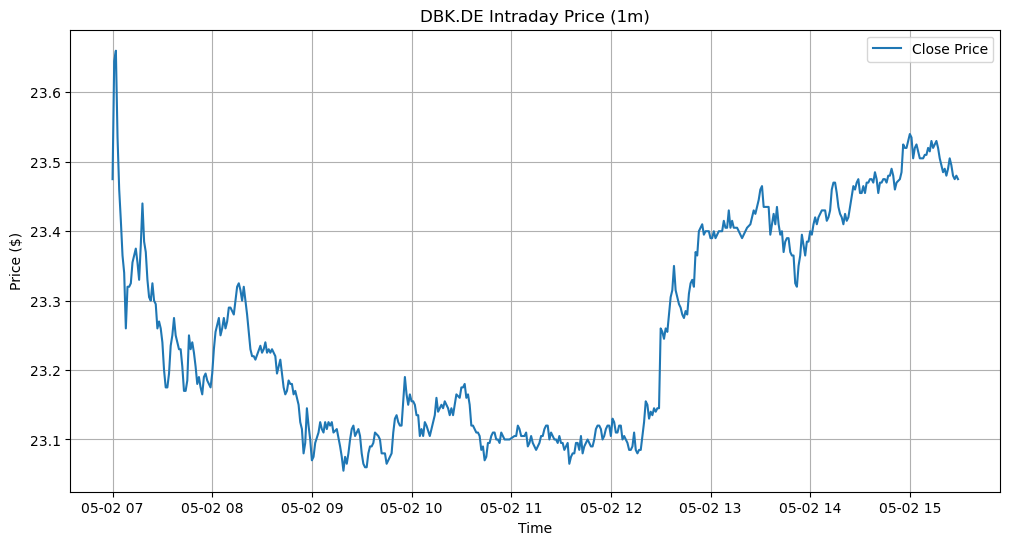

[*********************100%***********************]  1 of 1 completed


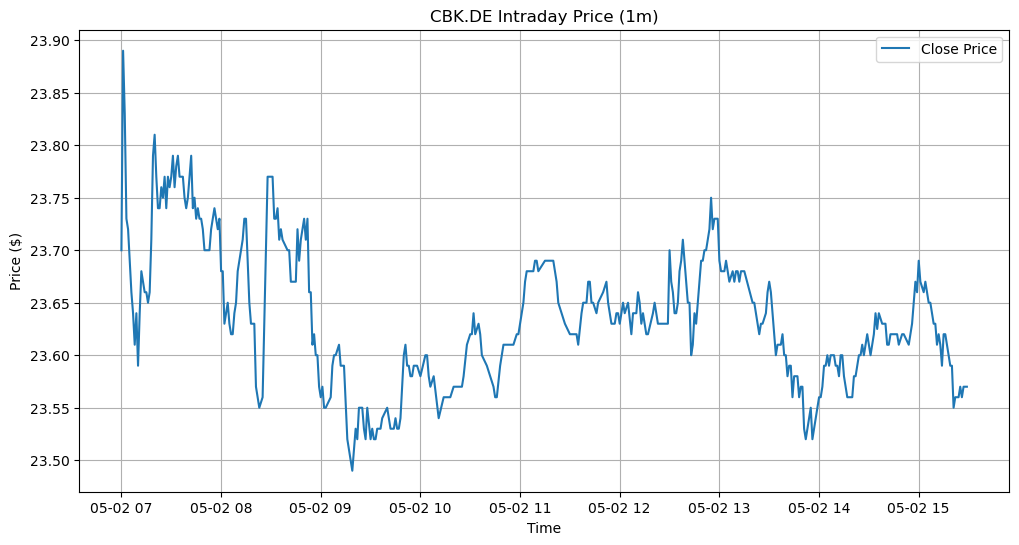

[*********************100%***********************]  1 of 1 completed


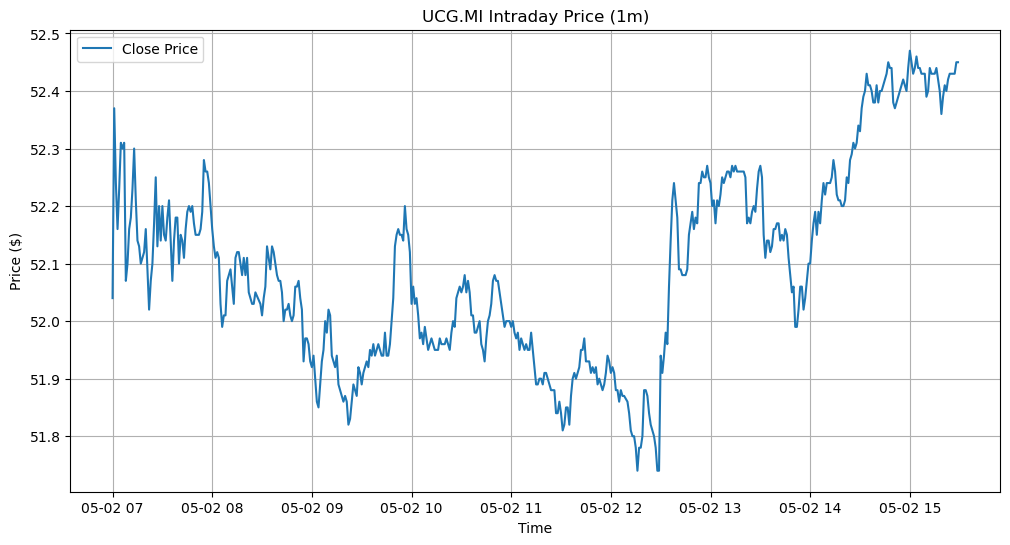

[*********************100%***********************]  1 of 1 completed


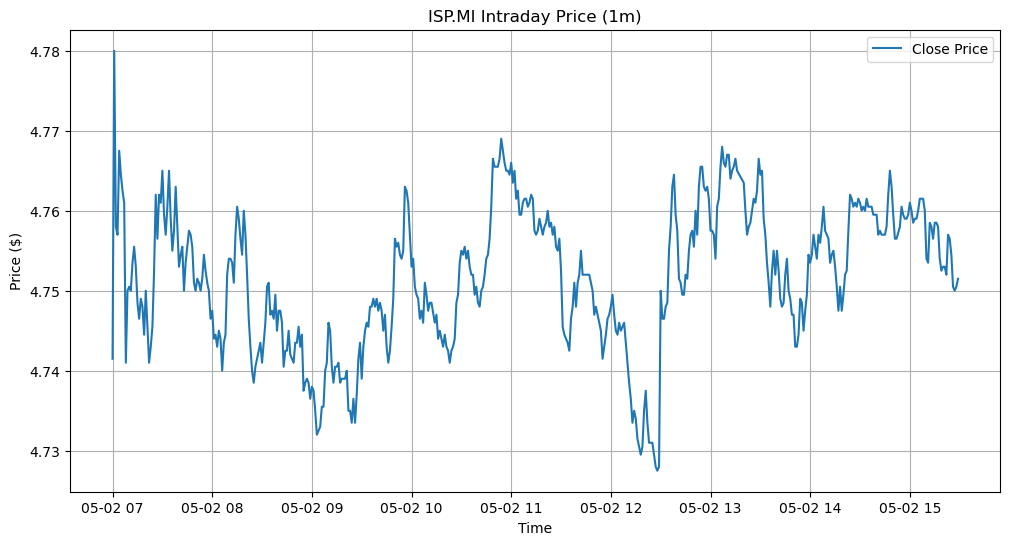

[*********************100%***********************]  1 of 1 completed


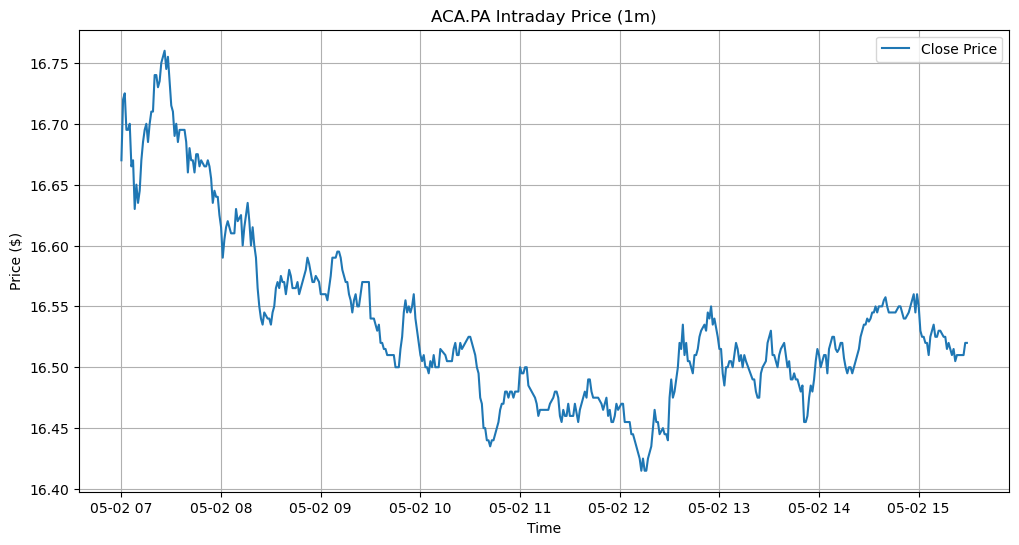

[*********************100%***********************]  1 of 1 completed


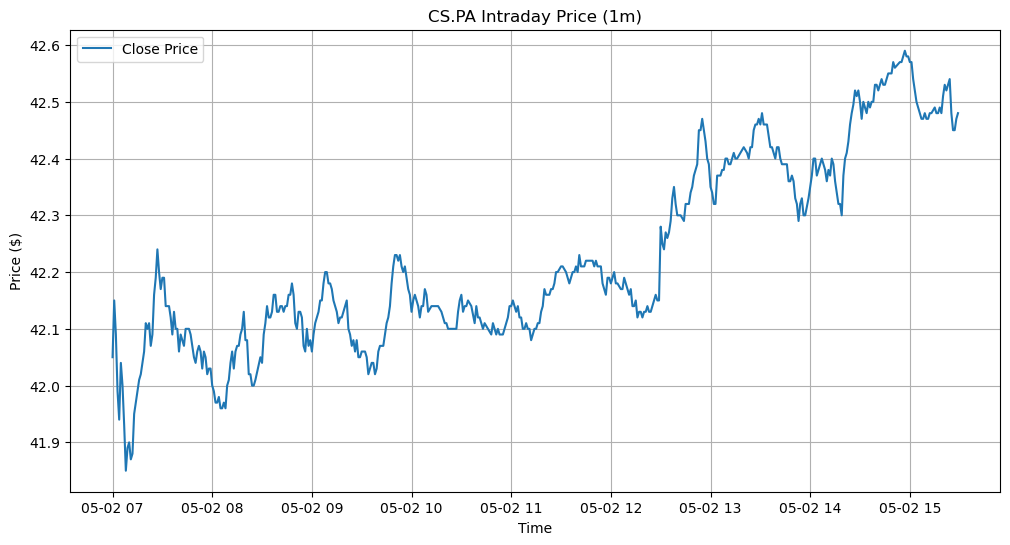

[*********************100%***********************]  1 of 1 completed


=== Sector: oil ===


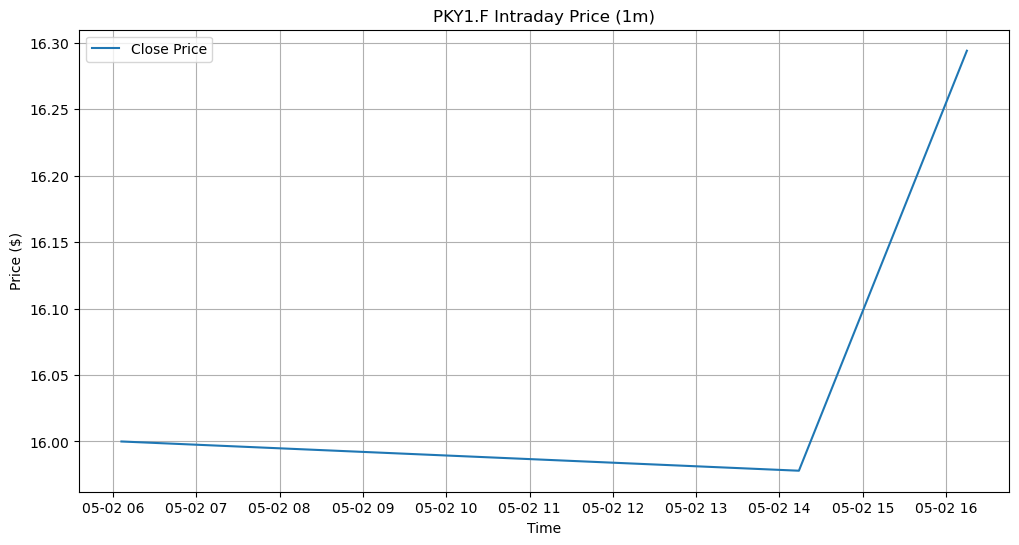

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Path to directory containing sector files
sector_dir = "tickers"
sector_tickers = {}

# Read each file and assign tickers to its sector (filename without .txt)
for file in os.listdir(sector_dir):
    if file.endswith(".txt"):
        sector = file.replace(".txt", "")
        with open(os.path.join(sector_dir, file), "r") as f:
            tickers = [line.strip() for line in f if line.strip()]
            sector_tickers[sector] = tickers

# Get today's date
date_str = datetime.now().strftime('%Y-%m-%d')
os.makedirs(date_str, exist_ok=True)

# Download and plot
for sector, tickers in sector_tickers.items():
    print(f"\n=== Sector: {sector} ===")
    for ticker in tickers:
        print(f"Downloading {ticker}...")
        data = yf.download(ticker, period="1d", interval="1m")
        if data.empty:
            print(f"No data for {ticker}")
            continue

        # Save CSV
        sector_path = os.path.join(date_str, sector)
        os.makedirs(sector_path, exist_ok=True)
        data.to_csv(f"{sector_path}/{ticker}_intraday_1m.csv")

        # Plot
        plt.figure(figsize=(12,6))
        plt.plot(data.index, data['Close'], label='Close Price')
        plt.title(f'{ticker} Intraday Price (1m)')
        plt.xlabel('Time')
        plt.ylabel('Price ($)')
        plt.grid(True)
        plt.legend()
        plt.show()